## Random Forest

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# RF
from sklearn.ensemble import RandomForestClassifier

In [9]:
training = pd.read_csv('test/training-person2.csv').fillna(0)
test = pd.read_csv('test/test-person2.csv').fillna(0)
sumbit = test['person'].to_frame()

In [10]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [11]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [12]:
X.columns

Index(['event', 'cantidadIngresosPorCampania',
       'cantidadDeVisualizacionesPorMarca', 'cantidadDeCheckouts',
       'cantidadConversiones', 'cantidadDeVisualizacionesDeLaHome',
       'cantidadDeGeneracionDeNotificaciones', 'cantidadDeIngresosPorBuscador',
       'cantidadDeProductosBuscados', 'cantidadDeVisitas',
       'cantidadDeVisualizacionesDeProducto', 'cantidadDeIngresosPorUrl',
       'model', 'count_top_viewed_product', 'condition',
       'count_top_viewed_product_cond', 'device_type', 'returning',
       'last_event_days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'searched_model',
       'count_top_searched_model', 'region', 'city', 'country'],
      dtype='object')

In [25]:
rdf = RandomForestClassifier(
    min_samples_split=4,
    criterion = 'entropy',
    random_state=RANDOM_SEED,
    n_estimators=1000
)

In [26]:
# Training
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [27]:
# Predict value
ret = rdf.predict_proba(X_test)

In [28]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.8410350781533988

In [29]:
rdf.score(X_test, y_test)

0.9438722966014418

In [30]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [31]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

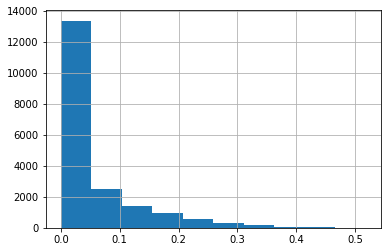

In [32]:
g = (sumbit['label']).hist()

In [33]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cantidadDeCheckouts  Importance: 0.1273555
Variable: last_event_days      Importance: 0.0698096
Variable: device_type          Importance: 0.0588713
Variable: model                Importance: 0.0584946
Variable: city                 Importance: 0.0532023
Variable: condition            Importance: 0.0531895
Variable: searched_model       Importance: 0.0522083
Variable: region               Importance: 0.0516655
Variable: country              Importance: 0.0497213
Variable: event                Importance: 0.0467491
Variable: cantidadDeVisualizacionesDeProducto Importance: 0.0386354
Variable: count_top_viewed_product_cond Importance: 0.0334385
Variable: count_top_viewed_product Importance: 0.0314913
Variable: cantidadDeVisualizacionesPorMarca Importance: 0.0311844
Variable: events_mean_frec_last_week Importance: 0.0308048
Variable: events_cout_last_week Importance: 0.0301324
Variable: cantidadIngresosPorCampania Importance: 0.0274611
Variable: cantidadDeVisualizacionesDeLaHome 

In [34]:
sumbit.to_csv('test/sumbit-2.csv', index=False)

In [35]:
training

,event,cantidadIngresosPorCampania,cantidadDeVisualizacionesPorMarca,cantidadDeCheckouts,cantidadConversiones,cantidadDeVisualizacionesDeLaHome,cantidadDeGeneracionDeNotificaciones,cantidadDeIngresosPorBuscador,cantidadDeProductosBuscados,cantidadDeVisitas,...,returning,last_event_days,events_cout_last_week,events_mean_frec_last_week,searched_model,count_top_searched_model,region,city,country,label
0,65,10.0,15.0,1.0,0.0,7.0,0.0,7.0,0.0,0.0,...,4,9.0,7.0,9.000000,0.050810,0.0,0.055563,0.063969,0.052300,0
1,25,0.0,3.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,2,10.0,0.0,0.000000,0.050651,0.0,0.050549,0.050254,0.051657,0
2,53,0.0,3.0,1.0,0.0,3.0,0.0,4.0,13.0,0.0,...,1,10.0,0.0,0.000000,0.084364,6.0,0.055233,0.063526,0.052169,0
3,20,5.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0,13.0,0.0,0.000000,0.049559,0.0,0.051063,0.050222,0.050554,0
4,819,12.0,30.0,18.0,2.0,62.0,1.0,1.0,5.0,2.0,...,55,2.0,44.0,6.090909,0.049911,0.0,0.059087,0.051015,0.051701,0
5,47,1.0,1.0,2.0,0.0,5.0,0.0,1.0,1.0,1.0,...,2,13.0,0.0,0.000000,0.058776,1.0,0.043956,0.044239,0.050723,0
6,139,13.0,3.0,1.0,0.0,7.0,0.0,4.0,5.0,1.0,...,12,0.0,54.0,1.222222,0.071212,3.0,0.049406,0.050660,0.052099,0
7,17,0.0,4.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0,13.0,0.0,0.000000,0.050239,0.0,0.073595,0.050538,0.051231,0
8,37,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,...,3,6.0,9.0,6.666667,0.050856,0.0,0.050957,0.050655,0.050828,0
9,75,7.0,0.0,4.0,5.0,12.0,0.0,7.0,6.0,8.0,...,2,13.0,0.0,0.000000,0.084052,6.0,0.055410,0.050038,0.051714,0
